In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Source:India Meterological Department/Ministry of Earth Science/Govt. of india

In [2]:
data = pd.read_excel('data/daily.xlsx')

In [3]:
!pip3 install xlrd

  Using cached https://files.pythonhosted.org/packages/b0/16/63576a1a001752e34bf8ea62e367997530dc553b689356b9879339cf45a4/xlrd-1.2.0-py2.py3-none-any.whl


In [4]:
data

,rainfall (mm/day),PET (mm/day),Q (mm/day),avg Temperature,Date,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,1951,1,1
1,NaN,NaN,NaN,NaN,1951,1,2
2,NaN,NaN,NaN,NaN,1951,1,3
3,NaN,NaN,NaN,NaN,1951,1,4
4,NaN,NaN,NaN,NaN,1951,1,5
...,...,...,...,...,...,...,...
23371,0.0,3.646389,0.033444,19.805,2014,12,27
23372,0.0,3.794536,0.032650,19.525,2014,12,28
23373,0.0,3.897361,0.031907,19.535,2014,12,29
23374,0.0,3.752435,0.031208,19.695,2014,12,30


In [5]:
data.columns

Index(['rainfall (mm/day)', 'PET (mm/day)', 'Q (mm/day)', 'avg Temperature',
       'Date ', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

About variables:
Rainfall:
PET
Q
avg Temp
Date


In [6]:
data.columns = ['Rainfall', 'PET (mm/day)', 'Q (mm/day)', 'Temperature',
       'Year', 'Month', 'Day']

In [7]:
data.head(2)

,Rainfall,PET (mm/day),Q (mm/day),Temperature,Year,Month,Day
0,NaN,NaN,NaN,NaN,1951,1,1
1,NaN,NaN,NaN,NaN,1951,1,2


In [8]:
req_data = data[['Rainfall','Temperature',
       'Year', 'Month', 'Day']]

In [9]:
df = req_data.loc[req_data['Year'] != 1951]

In [10]:
df

,Rainfall,Temperature,Year,Month,Day
365,0.0,21.140,1952,1,1
366,0.0,21.085,1952,1,2
367,0.0,21.020,1952,1,3
368,0.0,21.145,1952,1,4
369,0.0,21.390,1952,1,5
...,...,...,...,...,...
23371,0.0,19.805,2014,12,27
23372,0.0,19.525,2014,12,28
23373,0.0,19.535,2014,12,29
23374,0.0,19.695,2014,12,30


In [11]:
df = df.round({"Rainfall":2, "Temperature":2}) 

In [12]:
df

,Rainfall,Temperature,Year,Month,Day
365,0.0,21.14,1952,1,1
366,0.0,21.08,1952,1,2
367,0.0,21.02,1952,1,3
368,0.0,21.14,1952,1,4
369,0.0,21.39,1952,1,5
...,...,...,...,...,...
23371,0.0,19.80,2014,12,27
23372,0.0,19.52,2014,12,28
23373,0.0,19.54,2014,12,29
23374,0.0,19.70,2014,12,30


In [161]:
gb_df = df.groupby(['Year', 'Month'],as_index=False) 

monthly = gb_df['Rainfall','Temperature'].agg({
    'Rainfall':[max,sum],
    'Temperature':['mean',min,max]
})

monthly.columns = monthly.columns.droplevel(0)

monthly.columns = ['year','month','max_rainfall','total_rainfall','avg_temp','min_temp','max_temp']

monthly.to_csv('rainfall_per_year(monthwise).csv')

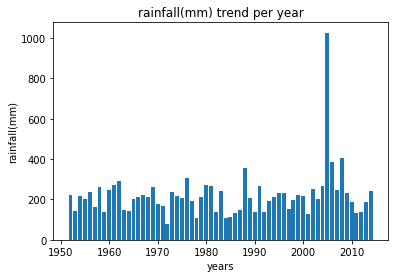

In [158]:
plt.bar(monthly['year'],monthly['total_rainfall'])
plt.title('rainfall(mm) trend per year')
plt.xlabel('years')
plt.ylabel('rainfall(mm)')
plt.show()

In [118]:
# Renaming columns
# gb_df.agg(
#     max_rainfall=('Rainfall',max),
#     total_rainfall=('Rainfall',sum),
#     min_temp = ('Temperature',min),
#     max_temp = ('Temperature',max),
#     avg_temp = ('Temperature','mean')
# )

In [160]:
month_agg = df.groupby('Month',as_index=False).agg({
    'Rainfall':[max,'mean'],
    'Temperature':['mean',min,max]
})
month_agg.columns = ['month','max_rainfall','mean_rainfall','avg_temp','min_temp','max_temp']
month_agg

,month,max_rainfall,mean_rainfall,avg_temp,min_temp,max_temp
0,1,19.90,0.046150,21.604173,15.21,25.64
1,2,9.38,0.026854,23.365034,15.48,27.98
2,3,15.05,0.071050,26.621787,19.93,30.62
3,4,22.08,0.133958,29.541762,24.56,33.57
4,5,68.71,0.473441,30.614060,25.97,34.54
5,6,320.34,4.046820,28.366693,23.69,33.15
6,7,132.59,4.654465,26.074578,23.24,29.94
7,8,96.67,3.825904,25.362028,22.92,27.95
8,9,122.58,4.708360,25.781889,22.62,29.24
9,10,78.12,1.983917,26.138372,22.30,29.86


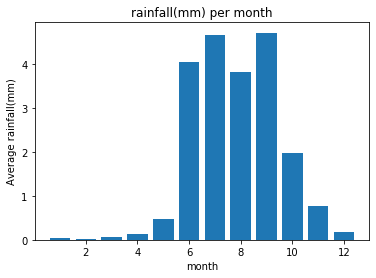

In [159]:
plt.bar(month_agg['month'],month_agg['mean_rainfall'])
plt.title('rainfall(mm) per month')
plt.xlabel('month')
plt.ylabel('Average rainfall(mm)')
plt.show()

In [183]:
gb_df = df.groupby(['Year','Month'],as_index=False)
year_month=gb_df['Rainfall'].sum()
july_trend = year_month[year_month['Month'] == 6]
july_trend

,Year,Month,Rainfall
5,1952,6,112.57
17,1953,6,90.68
29,1954,6,102.80
41,1955,6,43.84
53,1956,6,39.21
...,...,...,...
701,2010,6,175.65
713,2011,6,72.76
725,2012,6,30.95
737,2013,6,172.01


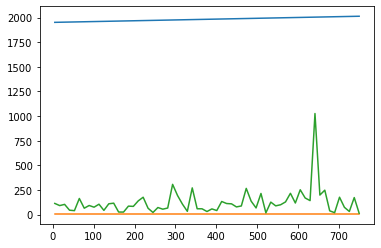

In [181]:
plt.plot(july_trend['Year'],)